<a href="https://colab.research.google.com/github/FionaGiudice/MIR/blob/master/TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importation des fonctions Keras

In [0]:
from IPython.display import Image, HTML, display
from matplotlib import pyplot as plt
from keras.preprocessing import image
from keras.models import Model, load_model
from matplotlib.pyplot import imread
import numpy as np
import os
import cv2 
import csv
import tensorflow as tf
from keras import backend as K
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.backend.tensorflow_backend import set_session
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import categorical_crossentropy
from keras.layers import Dense, GlobalAveragePooling2D, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.applications.xception import Xception, preprocess_input, decode_predictions #299*299
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions #224*224
from keras.applications.inception_v3 import InceptionV3, preprocess_input,decode_predictions# input shape= 299x299
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input,decode_predictions# input shape= 299x299
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.applications.densenet import DenseNet121, preprocess_input, decode_predictions# input shape= 224x224 
from keras.applications.densenet import DenseNet169, preprocess_input
from keras.applications.densenet import DenseNet201, preprocess_input
from keras.applications.nasnet import NASNetLarge, preprocess_input
from keras.applications.nasnet import NASNetMobile, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop, Nadam
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping
import math
import argparse
import matplotlib
import imghdr
import pickle as pkl
import datetime
from cycler import cycler
from PIL import Image, ImageEnhance
import operator
import numpy as np
np.random.seed(2017)
sess = tf.Session()

Using TensorFlow backend.


# 2. Téléchargement de la base de données 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Path of Fiona**


In [0]:
cd /content/drive/My Drive/MIR/

/content/drive/My Drive/MIR


**Path of Sédrick**

In [0]:
cd /content/drive/My Drive/MA2/Q1/MIR/

/content/drive/My Drive/MA2/Q1/MIR


Download the dataset (action needed the first time only!)

In [0]:
!wget http://www.ci.gxnu.edu.cn/cbir/GHIM20.zip

--2019-12-17 21:19:00--  http://www.ci.gxnu.edu.cn/cbir/GHIM20.zip
Resolving www.ci.gxnu.edu.cn (www.ci.gxnu.edu.cn)... 202.193.160.49, 202.193.160.52, 2001:250:3400:8f00::49
Connecting to www.ci.gxnu.edu.cn (www.ci.gxnu.edu.cn)|202.193.160.49|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1164654398 (1.1G) [application/x-zip-compressed]
Saving to: ‘GHIM20.zip’

GHIM20.zip          100%[===================>]   1.08G   228KB/s    in 1h 41m  

2019-12-17 23:00:14 (187 KB/s) - ‘GHIM20.zip’ saved [1164654398/1164654398]



In [0]:
!unzip GHIM20.zip

Archive:  GHIM20.zip
   creating: GHIM-20库/
  inflating: GHIM-20库/0_1.jpg      
  inflating: GHIM-20库/0_10.jpg     
  inflating: GHIM-20库/0_100.jpg    
  inflating: GHIM-20库/0_101.jpg    
  inflating: GHIM-20库/0_102.jpg    
  inflating: GHIM-20库/0_103.jpg    
  inflating: GHIM-20库/0_104.jpg    
  inflating: GHIM-20库/0_105.jpg    
  inflating: GHIM-20库/0_106.jpg    
  inflating: GHIM-20库/0_107.jpg    
  inflating: GHIM-20库/0_108.jpg    
  inflating: GHIM-20库/0_109.jpg    
  inflating: GHIM-20库/0_11.jpg     
  inflating: GHIM-20库/0_110.jpg    
  inflating: GHIM-20库/0_111.jpg    
  inflating: GHIM-20库/0_112.jpg    
  inflating: GHIM-20库/0_113.jpg    
  inflating: GHIM-20库/0_114.jpg    
  inflating: GHIM-20库/0_115.jpg    
  inflating: GHIM-20库/0_116.jpg    
  inflating: GHIM-20库/0_117.jpg    
  inflating: GHIM-20库/0_118.jpg    
  inflating: GHIM-20库/0_119.jpg    
  inflating: GHIM-20库/0_12.jpg     
  inflating: GHIM-20库/0_120.jpg    
  inflating: GHIM-20库/0_121.jpg    
  inflating: GHIM-20

In [0]:
 # !unrar x GHIM-20.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from GHIM-20.rar


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-25a985fd2715>", line 1, in <module>
    get_ipython().system('unrar x GHIM-20.rar')
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_shell.py", line 96, in system
    output = _system_commands._system_compat(self, *args, **kwargs)  # pylint:disable=protected-access
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_system_commands.py", line 438, in _system_compat
    shell.var_expand(cmd, depth=2), clear_streamed_output=False)
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_system_commands.py", line 195, in _run_command
    return _monitor_process(parent_pty, epoll, p, cmd, update_stdin_widget)
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_system_commands.py", line 222, in _monitor_process
    result = _poll_process(paren

KeyboardInterrupt: ignored

Another way to unrar

In [0]:
# pip install patool

     |████████████████████████████████| 81kB 9.6MB/s 


In [0]:
# from patoolib import extract_archive
# import os
# rarfile = 'GHIM-20.rar'
# extract_to = '../../../data/'
# os.mkdir(extract_to) 
# extract_archive(rarfile, outdir=extract_to)

patool: Extracting GHIM-20.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/Projet MIR/GHIM-20.rar"
patool:     with cwd='../../../data/'
patool: ... GHIM-20.rar extracted to `../../../data/'.


'../../../data/'

# 3. Similarity calculation functions and getkVoisins()

In [0]:
def euclidianDistance(l1,l2):
  distance = 0
  length = min(len(l1),len(l2))
  for i in range(length):
      distance += math.pow(l1[i]-l2[i],2)
  return math.sqrt(distance)

In [0]:
def chiSquareDistance(l1,l2):
  distance = 0
  length = min(len(l1),len(l2))
  for i in range(length):
    distance += ((l2[i]-l1[i])**2)/l2[i]
  return distance 

In [0]:
def correlation(l1,l2):
  corr1 = 0
  corr2 = 0
  corr3 = 0
  distance = 0
  N_k1 = 0
  N_k2 = 0
  length = min(len(l1),len(l2))

  for i in range(length):
    N_k1 += l1[i]
    N_k2 += l2[i]
  N_1 = (1/length) * N_k1
  N_2 = (1/length) * N_k2

  for i in range(length):
    corr1 += (l1[i] - N_1)*(l2[i]-N_2)
    corr2 += (l1[i]-N_1)**2
    corr3 += (l2[i]-N_2)**2
    
  distance = corr1 * (1/math.sqrt(corr2*corr3))
  return 1-distance   # un haut score représente un meilleur match qu'un petit score

In [0]:
def bhatta(l1,l2):
  distance = 0
  N_k1 = 0
  N_k2 = 0
  score = 0
  length = min(len(l1), len(l2))

  for i in range(length):
    N_k1 += l1[i]
    N_k2 += l2[i]
  N_1 = (1/length) * N_k1
  N_2 = (1/length) * N_k2  

  for i in range(length):
    score += math.sqrt( l1[i] * l2[i] );

  distance = math.sqrt( 1 - ( 1 / math.sqrt(N_1*N_2*length*length) ) * score); 
  return distance

In [0]:
def flann(l1,l2):
  FLANN_INDEX_KDTREE = 1
  INDEX_PARAM_TREES = 5
  SCH_PARAM_CHECKS = 50
  index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=INDEX_PARAM_TREES)
  # number of times the trees in the index should be recursively traversed
  # Higher values gives better precision, but also takes more time
  sch_params = dict(checks=SCH_PARAM_CHECKS)
  flann = cv.FlannBasedMatcher(index_params, sch_params)
  distance = flann.distance
  return distance

In [0]:
def bruteForceMatcher(l1,l2):
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  matches = bf.match(l1,l2)
  distance = matches.distance
  return distance

SyntaxError: ignored

In [0]:
def getkVoisins(lfeatures, test, k, fct_dist) :
  ldistances = []
  for i in range(len(lfeatures)):
      if fct_dist == 'euclidian' :
          dist = euclidianDistance(test[1], lfeatures[i][1])
      elif fct_dist == 'chiSquare' :
          dist = chiSquareDistance(test[1], lfeatures[i][1])
      elif fct_dist == 'correlation' :
          dist = correlation(test[1], lfeatures[i][1])
      elif fct_dist == 'bhatta' : 
          dist = bhatta(test[1], lfeatures[i][1])
      elif fct_dist == 'flann' : 
          dist = flann(test[1], lfeatures[i][1])
      ldistances.append((lfeatures[i][0], lfeatures[i][1], dist))
  ldistances.sort(key=operator.itemgetter(2))
  lvoisins = []
  for i in range(k):
      lvoisins.append(ldistances[i])
  return lvoisins

# **4. Descriptors**



In [0]:
#Combine descriptors function 
def combine(): 
  

SyntaxError: ignored

# a) Deep Learning

In [0]:
import os
bases_path_after="bases"
# Création du dossier pour sauvegrader le model
if os.path.exists(bases_path_after) == False :
    os.makedirs(bases_path_after)

In [0]:
current_directory = "/content/drive/My Drive/Projet MIR/" # Change path Fiona/Sédrick
read = "GHIM-20库/"
read_directory = os.path.join(current_directory,read)
class_directory = os.path.join(current_directory,bases_path_after)

#Create class paths
for i in range(20):
  path = os.path.join(class_directory,str(i))
  if os.path.exists(path) == False :
      os.makedirs(path)

In [0]:
ls

'3D ResNet.ipynb'          GHIM-20库/          'TFE Laurent VEREB.pdf'
 bases/                    I3D_Finetune.ipynb   TP4.ipynb
'CNN Inception V3.ipynb'   resnet_3d_34.json   'Two stream.ipynb'
 GHIM-20.rar               Sources.gdoc


Create all the existing classes and store the right images in it 

In [0]:
for file in os.listdir(read_directory):

  
  # if(int(file[0])<4 or file[2]=="_"):
  # if(file[0:2]!="17"):
  #  continue
  string=""
  #Get the class of the current image in "string"
  for i in range(len(file)):
    if(file[i]!="_"):
      string= string + file[i]
    else:
      break
  print(string)
  
  #Create a new class directory if not existing (already done before !!!!)
  # if os.path.exists(string) == False :
  #   path = os.path.join(class_directory,string)
  #   os.makedirs(path)
  
  #Actual image path  
  current_image=os.path.join(read_directory,file)
  img = cv2.imread(current_image)

  #Go to the class path and store the img in it 
  new_directory = os.path.join(class_directory,string)
  #print("new_dir = " + str(new_directory))
  new_path = os.path.join(new_directory,file)
  #print("new_path = " + str(new_path))
  if (img is None) == False:
    cv2.imwrite(new_path,img)

18
18
17
17
17
18
17
17
17
18
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
1

In [0]:
ls -l GHIM-20库/ | egrep -c '^-'

9994


In [0]:
ls -l bases/0 | egrep -c '^-'

494


In [0]:
ls -l bases/1 | egrep -c '^-'

500


In [0]:
ls -l bases/2 | egrep -c '^-'

500


In [0]:
ls -l bases/3 | egrep -c '^-'

500


In [0]:
ls -l bases/4 | egrep -c '^-'

500


In [0]:
ls -l bases/5 | egrep -c '^-'

500


In [0]:
ls -l bases/6 | egrep -c '^-'

500


In [0]:
ls -l bases/7 | egrep -c '^-'

500


In [0]:
ls -l bases/8 | egrep -c '^-'

500


In [0]:
ls -l bases/9 | egrep -c '^-'

500


In [0]:
ls -l bases/10 | egrep -c '^-'

500


In [0]:
ls -l bases/11 | egrep -c '^-'

500


In [0]:
ls -l bases/12 | egrep -c '^-'

500


In [0]:
ls -l bases/13 | egrep -c '^-'

500


In [0]:
ls -l bases/14 | egrep -c '^-'

500


In [0]:
ls -l bases/15 | egrep -c '^-'

500


In [0]:
ls -l bases/16 | egrep -c '^-'

500


In [0]:
ls -l bases/17 | egrep -c '^-'

499


In [0]:
ls -l bases/18 | egrep -c '^-'

500


In [0]:
ls -l bases/19 | egrep -c '^-'

500


Function generating path and labels according to batch_size

In [0]:
def generate_from_paths_and_labels(input_paths, labels, batch_size, input_size=(299,299)):

    num_samples = len(input_paths)
    while 1:
        perm = np.random.permutation(num_samples)
        input_paths = input_paths[perm]
        labels = labels[perm]
        for i in range(0, num_samples, batch_size):
            inputs = list(map(
                lambda x: image.load_img(x, target_size=input_size),
                input_paths[i:i+batch_size]
            ))
            inputs = np.array(list(map(
                lambda x: image.img_to_array(x),
                inputs
            )))
            inputs = preprocess_input(inputs)
            yield (inputs, labels[i:i+batch_size])

Create the txt file containing the class names

In [0]:
!for d in bases/*;do [[ -d "$d" ]] && echo "${d##bases/}" >> classes.txt; done

Some parameters (note : changing the classifier only changes the place where results are stocked /!\)

In [0]:
nb_classes = 20
nbr_batch_size=8
dataset_path = "/content/drive/My Drive/MA2/Q1/MIR/bases"
# dataset_name='big' 

# dataset_path = os.path.join('bases/', dataset_name)
classes_path = "classes.txt"
csv_path = 'result.csv'
epochs = 100 

seed = 1
classifier = "DenseNet169" 
result_path = 'results/'+classifier
log={
    'epochs':epochs,
    'batch_size':nbr_batch_size,
    'val_loss':-1,
    'val_acc':-1,  
}

In [0]:
if os.path.exists(result_path) == False:
    os.makedirs(result_path)

In [0]:
# Récupurer les noms des classes
 with open(classes_path, 'r') as f:
     classes = f.readlines()
     classes = list(map(lambda x: x.strip(), classes))
     print(classes)
 num_classes = len(classes)

 # Récupurer les images et les classes
 input_paths, labels = [], []
 for class_name in os.listdir(dataset_path):
     if class_name ==".ipynb_checkpoints":
       continue
     print("class_name = " + str(class_name))
     class_path = os.path.join(dataset_path, class_name)
     class_id = classes.index(class_name)
     for path in os.listdir(class_path):
         if path == ".ipynb_checkpoints":
           continue
         path = os.path.join(class_path, path)
         if imghdr.what(path) == None:
             # this is not an image file
             continue
         input_paths.append(path)
         labels.append(class_id)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '3', '4', '5', '6', '7', '8', '9']
class_name = 0
class_name = 1
class_name = 2
class_name = 3
class_name = 4
class_name = 5
class_name = 6
class_name = 7
class_name = 8
class_name = 9
class_name = 10
class_name = 11
class_name = 12
class_name = 13
class_name = 14
class_name = 15
class_name = 16
class_name = 17
class_name = 18
class_name = 19


In [0]:
# Question 1: Convertir les labels vers le format one-hot-vector
labels=to_categorical(labels,num_classes)

# Question 2: Convertir "convert "input paths" vers le format numpy
input_paths = np.array(input_paths)

# shuffle dataset (permuter les données)
perm = np.random.permutation(len(input_paths))
labels = labels[perm]
input_paths = input_paths[perm]

# Question3 : Diviser les données en deux parties : entrainement et validation
border=int(0.8*len(input_paths))

train_labels, val_labels = labels[:border], labels[border:]
train_input_paths, val_input_paths = input_paths[:border], input_paths[border:]
print("Training on %d images and labels" % (len(train_input_paths)))
print("Validation on %d images and labels" % (len(val_input_paths)))

Training on 7994 images and labels
Validation on 1999 images and labels


The model

In [0]:
input_size = (299,299,3)

# model0=VGG16(weights='imagenet', include_top=True,pooling='avg')
# model0 = VGG19(weights='imagenet', include_top=True,pooling = 'avg')
base_model = InceptionResNetV2(include_top=False, weights='imagenet',input_shape = input_size, pooling='avg',classes=nb_classes)

x=base_model.output
print(x)
#x= GlobalAveragePooling2D()(x)
x= Dense(1024, activation='relu')(x)
x= Dropout(0.2)(x)
predictions = Dense(20, activation='softmax')(x)
model0= Model(inputs=base_model.inputs, output=predictions)

# model11 = Model(inputs=model0.input, outputs=model0.layers[-1].output)

Tensor("global_average_pooling2d_7/Mean:0", shape=(?, 1536), dtype=float32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  del sys.path[0]


In [0]:
model0.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_813 (Conv2D)             (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_813 (BatchN (None, 149, 149, 32) 96          conv2d_813[0][0]                 
__________________________________________________________________________________________________
activation_813 (Activation)     (None, 149, 149, 32) 0           batch_normalization_813[0][0]    
____________________________________________________________________________________________

In [0]:
callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=3,restore_best_weights=False),
    ModelCheckpoint(filepath=result_path+'/weights.de{epoch:04d}-{val_loss:.4f}-{val_acc:.4f}.h5',save_best_only=True,monitor='val_loss'),
]
# ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.00001)

Freezing layers

In [0]:
#Fine_tuning en freezant les couches sauf celles de Dense en fin de modèle
freeze=7

#Counts the total number of layers in the model 
a=0
for layer in model0.layers:
  a=a+1
  #layer.trainable=True
  # print(layer)
print(a)
#Freeze the layers 
for layer in model0.layers[0:(a-freeze)]:
  layer.trainable=False

784


In [0]:
for l in model0.layers:
    print(l.name, l.trainable)

input_5 False
conv2d_813 False
batch_normalization_813 False
activation_813 False
conv2d_814 False
batch_normalization_814 False
activation_814 False
conv2d_815 False
batch_normalization_815 False
activation_815 False
max_pooling2d_17 False
conv2d_816 False
batch_normalization_816 False
activation_816 False
conv2d_817 False
batch_normalization_817 False
activation_817 False
max_pooling2d_18 False
conv2d_821 False
batch_normalization_821 False
activation_821 False
conv2d_819 False
conv2d_822 False
batch_normalization_819 False
batch_normalization_822 False
activation_819 False
activation_822 False
average_pooling2d_5 False
conv2d_818 False
conv2d_820 False
conv2d_823 False
conv2d_824 False
batch_normalization_818 False
batch_normalization_820 False
batch_normalization_823 False
batch_normalization_824 False
activation_818 False
activation_820 False
activation_823 False
activation_824 False
mixed_5b False
conv2d_828 False
batch_normalization_828 False
activation_828 False
conv2d_826 Fals

Compile and train

In [0]:
model0.compile(
    optimizer = SGD(lr=0.001),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [0]:
# ====================================================
# Train the whole model
# ====================================================

# Question 5 : Compléter l'appel a fonction fit_generator pour l'entrainement 
history=model0.fit_generator(
    generator=generate_from_paths_and_labels(
        input_paths=train_input_paths,
        labels=train_labels,
        batch_size=nbr_batch_size,
        input_size=input_size
        
    ),
    steps_per_epoch=math.ceil(len(train_input_paths) / nbr_batch_size),
    epochs=epochs,
    validation_data=generate_from_paths_and_labels(
        input_paths=val_input_paths,
        labels=val_labels,
        batch_size=nbr_batch_size,
        input_size=input_size
    ),
    callbacks=callbacks,
    validation_steps=math.ceil(len(val_input_paths) / nbr_batch_size),
    verbose=1
)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
1000/1000 [==============================] - 171s 171ms/step - loss: 2.0201 - acc: 0.6353 - val_loss: 0.9283 - val_acc: 0.9145
Epoch 2/100
1000/1000 [==============================] - 141s 141ms/step - loss: 0.8662 - acc: 0.8844 - val_loss: 0.4019 - val_acc: 0.9335
Epoch 3/100
1000/1000 [==============================] - 140s 140ms/step - loss: 0.5344 - acc: 0.9140 - val_loss: 0.2644 - val_acc: 0.9450
Epoch 4/100
1000/1000 [==============================] - 140s 140ms/step - loss: 0.4101 - acc: 0.9210 - val_loss: 0.2019 - val_acc: 0.9520
Epoch 5/100
1000/1000 [==============================] - 140s 140ms/step - loss: 0.3409 - acc: 0.9289 - val_loss: 0.1741 - val_acc: 0.9540
Epoch 6/100
1000/1000 [==============================] - 140s 140ms/step - loss: 0.3031 - acc: 0.9318 - val_loss: 0.1474 - val_acc: 0.9580
Epoch 7/100
1000/1000 [==============================] - 140s 140ms/st

# b) SIFT

In [0]:
def siftDescriptor(image):
  sift = cv2.xfeatures2d.SIFT_create()
  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  keypoints = sift.detect(gray,None)
  keypoints_sift, descriptor_sift = sift.compute(gray, keypoints)
  return keypoints_sift, descriptor_sift

# c) SURF

In [0]:
def surfDescriptor(image):
  surf=cv2.SURF()
  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  keypoints_surf, descriptor_surf = surf.detectAndCompute(gray, None)
  return keypoints_surf, descriptor_surf

# d) ORB

In [0]:
def orbDescriptor(image):
  orb = cv2.ORB_create()
  keypoints, descriptor_orb = orb.detectAndCompute(image, None)
  return descriptor_orb

# e) LBP

In [0]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb

In [0]:
def lbpDescriptor(image):
# settings for LBP
  METHOD = 'uniform'
  radius = 3
  n_points = 8 * radius
  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  lbp = local_binary_pattern(gray, n_points, radius, METHOD)
  return lbp

# f) GLCM

In [0]:
from skimage.feature import greycomatrix, greycoprops

In [0]:
def glcm(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = greycomatrix(gray, distances=[1], angles=[0, np.pi/4, np.pi/2], symmetric=True, normed=True)
    return glcm

# General code for features extraction and testing

In [0]:
def indexation(choice_descript) :
  pas =0
  descriptor = choice_descript
  files = "GHIM-20" #chemin vers la base d'images
  features1 = [] #Stocker les caractérstiques

  big_folder="Features_train/" #Dossier pour stocker les caractéristiques
  if not os.path.exists(big_folder):
      os.makedirs(big_folder)
  folder_descript="Features_train/{}/".format(descriptor)
  if not os.path.exists(folder_descript):
      os.makedirs(folder_descript)
  for j in os.listdir(files) :
      data = os.path.join(files, j)
      print(data)
      if not data.endswith(".jpg"):
          continue
      file_name = os.path.basename(data)
      
      image = cv2.imread(data)
     
      if descriptor == 'sift':
          kp, des = siftDescriptor(image)
          features = des.tolist()
      elif descriptor == 'surf':
          kp, des = surfDescriptor(image)
          features = des.tolist()
      elif descriptor == 'lbp':
          des = lbpDescriptor(image)
          features = des.tolist()
          
      features = np.array(features[0])
      np.savetxt(folder_descript+"/"+os.path.splitext(file_name)[0]+".txt",features)
      features1.append((data,features))
      print (pas)
      pas = pas+1
  with open("Features_train/{}.txt".format(descriptor), "w") as output:
        output.write(str(features1))

  return features1

In [0]:
features1 = indexation('sift')

GHIM-20/0_10.jpg
0
GHIM-20/0_1.jpg
1
GHIM-20/0_12.jpg
2
GHIM-20/0_11.jpg
3
GHIM-20/0_118.jpg
4
GHIM-20/0_123.jpg
5
GHIM-20/0_114.jpg
6
GHIM-20/0_125.jpg
7
GHIM-20/0_109.jpg
8
GHIM-20/0_126.jpg
9
GHIM-20/0_100.jpg
10
GHIM-20/0_116.jpg
11
GHIM-20/0_120.jpg
12
GHIM-20/0_128.jpg
13
GHIM-20/0_105.jpg
14
GHIM-20/0_107.jpg
15
GHIM-20/0_122.jpg
16
GHIM-20/0_121.jpg
17
GHIM-20/0_103.jpg
18
GHIM-20/0_112.jpg
19
GHIM-20/0_124.jpg
20
GHIM-20/0_115.jpg
21
GHIM-20/0_110.jpg
22
GHIM-20/0_102.jpg
23
GHIM-20/0_104.jpg
24
GHIM-20/0_111.jpg
25
GHIM-20/0_117.jpg
26
GHIM-20/0_108.jpg
27
GHIM-20/0_119.jpg
28
GHIM-20/0_101.jpg
29
GHIM-20/0_106.jpg
30
GHIM-20/0_113.jpg
31
GHIM-20/0_127.jpg
32
GHIM-20/0_129.jpg
33


In [0]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 25.0MB 111.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


     |████████████████████████████████| 30.6MB 95.9MB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


0_1


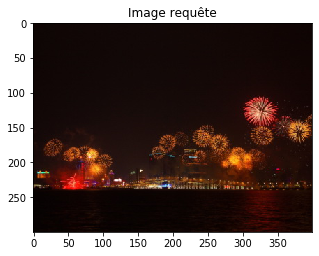

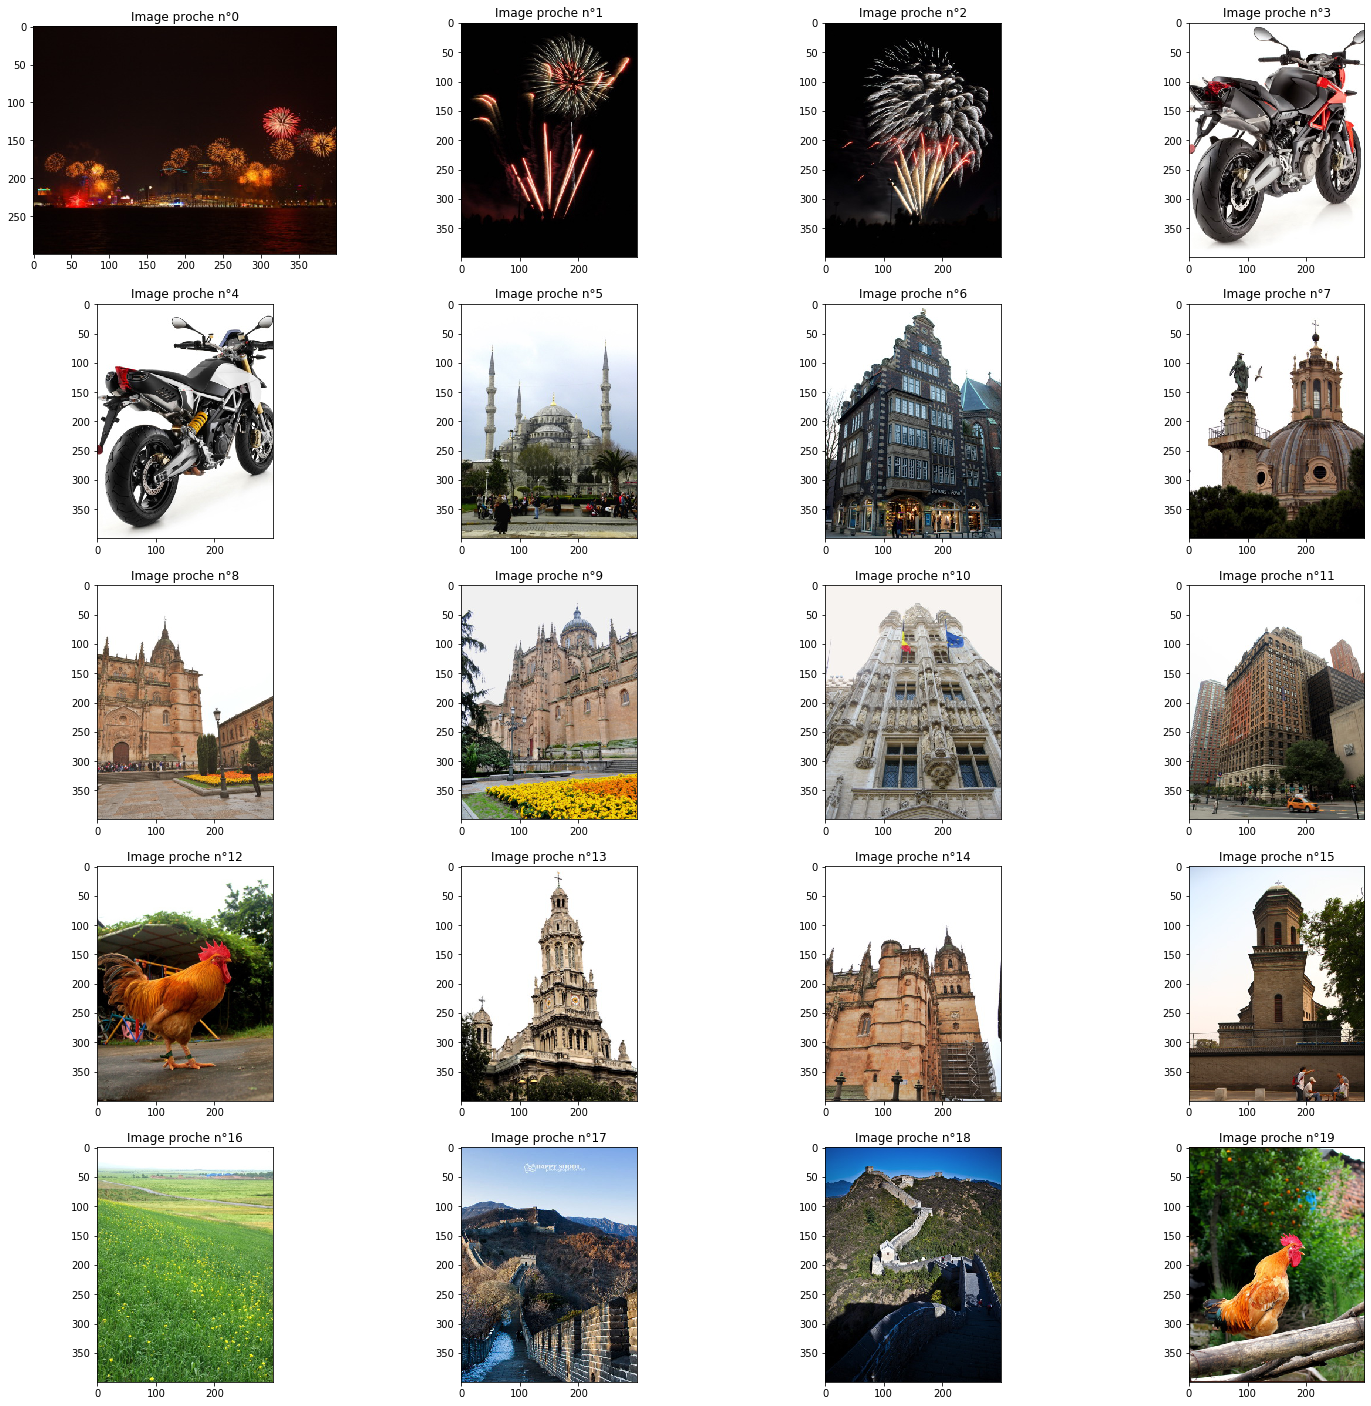

In [0]:
import warnings
warnings.filterwarnings('ignore')
sortie = 20

voisins = getkVoisins(features1, features1[0],sortie, 'euclidian') 

nom_image_plus_proches = []
nom_image_plus_proches_sans = []

for k in range(sortie):
    nom_image_plus_proches.append(voisins[k][0])
plt.figure(figsize=(5, 5))
plt.imshow(imread(features1[0][0]), cmap='gray', interpolation='none')
plt.title("Image requête")
nom_image_requete=os.path.splitext(os.path.basename(features1[0][0]))[0]
print(nom_image_requete)

plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.2, wspace=0.2)
for j in range(sortie):
    plt.subplot(sortie/4,sortie/5,j+1)
    plt.imshow(imread(nom_image_plus_proches[j]), cmap='gray', interpolation='none')
    nom_image_plus_proches_sans.append(os.path.splitext(os.path.basename(nom_image_plus_proches[j]))[0])
    title = "Image proche n°"+str(j)
    plt.title(title)

In [0]:
text_file = open("RP1_{}.txt".format(name), "w")
rappel_precision=[]
rp = []
position1=int(nom_image_requete)//100
for j in range(sortie):
  position2=int(nom_image_plus_proches_sans[j])//100
  if position1==position2:
    rappel_precision.append("pertinent")
  else:
    rappel_precision.append("non pertinent")

for i in range(sortie):
  j=i
  val=0
  while j>=0:
    if rappel_precision[j]=="pertinent":
      val+=1
    j-=1
  rp.append(str((val/(i+1))*100)+" "+str((val/sortie)*100))

with open("RP1_{}.txt".format(name), 'w') as s:
  for a in rp:
    s.write(str(a) + '\n') 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

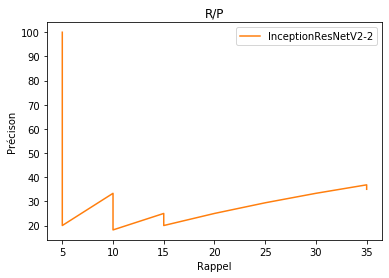

In [0]:
import csv
x = []
y = []
fichier = "RP1_{}.txt".format(name)
with open(fichier) as csvfile:
 plots = csv.reader(csvfile, delimiter=' ')
 for row in plots:
  x.append(float(row[0]))
  y.append(float(row[1]))
  fig = plt.figure()
line, =plt.plot(y,x,'C1', label=name)
plt.xlabel('Rappel')
plt.ylabel('Précison')
plt.title("R/P")
plt.legend()